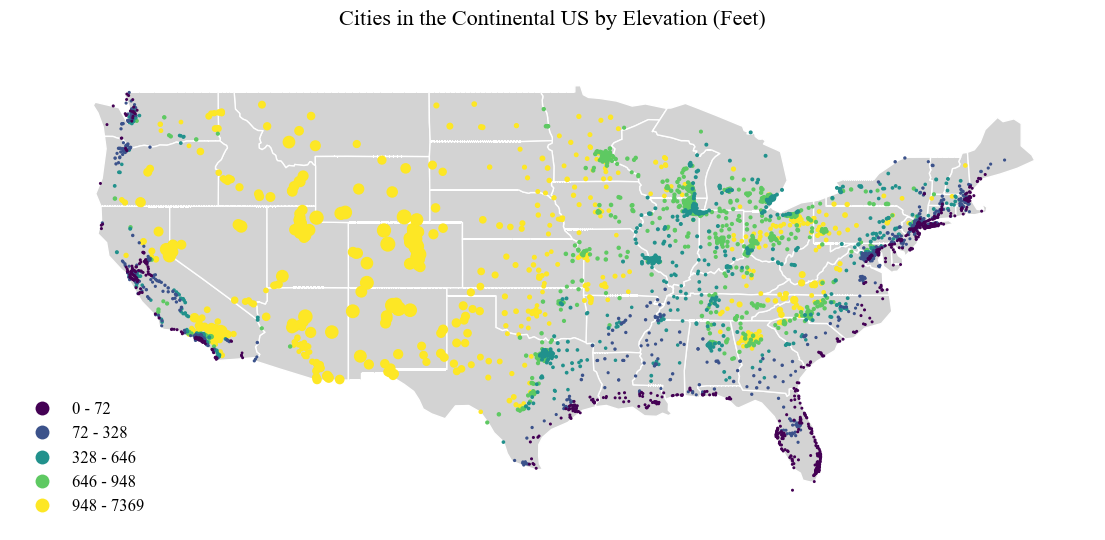

In [27]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

# 1. 加载数据
contiguous_usa = gpd.read_file("contiguous-usa.geojson")
usa_cities = gpd.read_file("usa-cities.geojson")

# 2. 筛选数据
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]')  # 去掉 HI, AK, PR

# 3. 绘制图形
fig, ax = plt.subplots(figsize=(14, 10), subplot_kw={'projection': gcrs.PlateCarree()})

# 绘制美国大陆州边界
gplt.polyplot(
    contiguous_usa,
    edgecolor="white",
    facecolor="lightgray",
    ax=ax
)

# 绘制城市点，按海拔高度着色和调整点大小
gplt.pointplot(
    continental_usa_cities,
    ax=ax,
    hue="ELEV_IN_FT",          # 按海拔高度着色
    cmap="viridis",            # 使用颜色渐变
    scheme="quantiles",        # 使用分位数分类
    scale="ELEV_IN_FT",        # 按海拔调整点大小
    limits=(1, 10),            # 点大小范围
    legend=True,               # 显示图例
    legend_var="hue",          # 图例按颜色分组
    legend_kwargs={"frameon": False, "fontsize": 12}
)

# 添加标题
ax.set_title("Cities in the Continental US by Elevation (Feet)", fontsize=16, pad=20)

# 保存高分辨率图像
#plt.savefig("elevation_map_platecarree.png", dpi=300, bbox_inches='tight')
plt.show()
